<a href="https://colab.research.google.com/github/RHMalalatiana/Recombination_code/blob/main/range_of_recombination_rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/RHMalalatiana/Recombination_code.git

fatal: destination path 'Recombination_code' already exists and is not an empty directory.


In [2]:
import sys
sys.path.append('/content/Recombination_code') # Update path

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data_gen_dist_rec import *

# Define range of recombination rates
recombination_rates = np.linspace(0.01, 0.2, 20)  # 20 values between 0.01 and 0.2

# Function to calculate distances for a given rate
def calculate_distances(rate):
    list_d12 = []
    list_d13 = []
    list_d23 = []
    list_d3rec = []
    list_d1rec = []
    n_simulation = 10000

    for i in range(n_simulation):
      #we define the initial genome as a sequence of a of length 500
      initial_gen='a'*500
      #here is the input tree of the form [genTime, leftBranch, RightBranch] in this case we have tree of 3 leaves
      gen_time=[1.0,[1.0,[1.0],[1.0]],[1.0]]
      #we start generating the genome sequences of the tree
      tree=generateDriver(initial_gen,gen_time)
      #here we extract the sequences generated
      seq=extract_genomes(tree)
      seq1=seq[0]
      seq3=seq[2]
      seq2=seq[1]
      #let us see the distance between them. Here d_12 should be short and d_13, d_23 should be long
      d_12=hamming_distance(seq1,seq2)
      d_23=hamming_distance(seq2,seq3)
      list_d12.append(d_12)
      list_d23.append(d_23)
      recombination_rate = rate  # Use the given rate
      seq_rec = simulate_recombination(seq1, seq3, recombination_rate)
      #here we compute the distance between the recombinant sequence and its parents
      d_1rec=hamming_distance(seq1,seq_rec)
      d_3rec=hamming_distance(seq3,seq_rec)
      list_d1rec.append(d_1rec)
      list_d3rec.append(d_3rec)

    return list_d12, list_d23, list_d1rec, list_d3rec

In [4]:
# Store results for plotting
results = []

# Iterate and calculate distances
for rate in recombination_rates:
    list_d12, list_d23, list_d1rec, list_d3rec = calculate_distances(rate)

    # Store key statistics (e.g., min, max, median)
    results.append({
        'rate': rate,
        'd_AB_min': np.min(list_d12),
        'd_AB_max': np.max(list_d12),
        'd_AB_rec_min': np.min(list_d1rec),
        'd_AB_rec_max': np.max(list_d1rec),
        'd_BC_min': np.min(list_d23),
        'd_BC_max': np.max(list_d23),
        'd_BC_rec_min': np.min(list_d3rec),
        'd_BC_rec_max': np.max(list_d3rec),
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

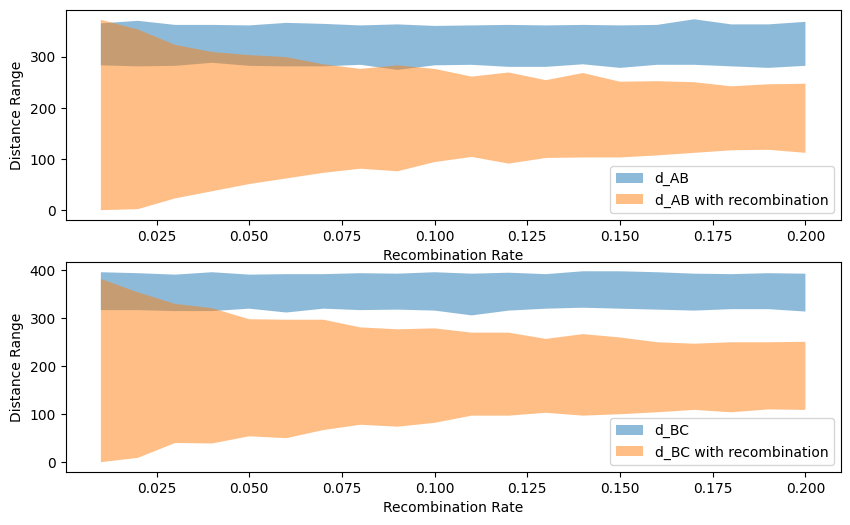

In [11]:
# Plot the ranges
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.fill_between(results_df['rate'], results_df['d_AB_min'], results_df['d_AB_max'], alpha=0.5, label='d_AB')
plt.fill_between(results_df['rate'], results_df['d_AB_rec_min'], results_df['d_AB_rec_max'], alpha=0.5, label='d_AB with recombination')
plt.xlabel('Recombination Rate')
plt.ylabel('Distance Range')
plt.legend()
plt.subplot(2, 1, 2)
plt.fill_between(results_df['rate'], results_df['d_BC_min'], results_df['d_BC_max'], alpha=0.5, label='d_BC')
plt.fill_between(results_df['rate'], results_df['d_BC_rec_min'], results_df['d_BC_rec_max'], alpha=0.5, label='d_BC with recombination')
plt.xlabel('Recombination Rate')
plt.ylabel('Distance Range')
plt.legend()
#plt.title('Range of Distances for Different Recombination Rates')
plt.show()